In [ ]:
import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d gmlmrinalini/manwomandetection

 88% 121M/138M [00:01<00:00, 98.5MB/s]
100% 138M/138M [00:01<00:00, 95.7MB/s]


In [ ]:
#!unzip /content/manwomandetection.zip

In [ ]:
#압축풀기
import os
import zipfile

local_zip = '/content/manwomandetection.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#경로 지정하기

base_dir='/content/dataset' #기본 주소

train_dir=os.path.join(base_dir,'train')#train의 주소는 기본 주소에 train이라고 적혀있는 파일에 접근해라
test_dir=os.path.join(base_dir,'test')#test의 주소는 기본 주소에 test라고 적혀있는 파일에 접근해라

In [ ]:
#훈련에 사용되는 사람 이미지 경로
train_man_dir=os.path.join(train_dir,'man')#위에 훈련용 경로에 접근을 해서 man이라는 파일에 접근해라
train_woman_dir=os.path.join(train_dir,'woman')#train폴더내에 woman 폴더에 접근하라
print(train_man_dir,'\n',train_woman_dir)

#test용 이미지 경로
test_man_dir=os.path.join(test_dir,'man')
test_woman_dir=os.path.join(test_dir,'woman')
print(test_man_dir,'\n',test_woman_dir)

#폴더명에 맞춰서 이미지를 저장하는 이유는 이미지를 불러올 때 폴더명에 맞춰서 자동으로 labelling하는 flow_from_directory( ) 함수의 기능을 활용하기 위함이다.

/content/dataset/train/man 
 /content/dataset/train/woman
/content/dataset/test/man 
 /content/dataset/test/woman


In [ ]:
#데이터 살펴보기

In [ ]:
train_man_fnames=os.listdir(train_man_dir)#os.listdir 리스트로 변환해줌
train_woman_fnames=os.listdir(train_woman_dir)

print(train_man_fnames[:5],'\n',train_woman_fnames[:5])
#list형태 

#test
test_man_fnames=os.listdir(test_man_dir)#os.listdir 리스트로 변환해줌
test_woman_fnames=os.listdir(test_woman_dir)

['face_1303.jpg', 'face_1213.jpg', 'face_1140.jpg', 'face_720.jpg', 'face_1288.jpg'] 
 ['face_1213.jpg', 'face_1140.jpg', 'face_720.jpg', 'face_1288.jpg', 'face_954.jpg']


In [ ]:
type(train_man_fnames)

list

In [ ]:
#각각의 파일에 몇개의 데이터가 있는지 확인해보기

print('train man {}'.format(len(train_man_fnames)))
print('train woman {}'.format(len(train_woman_fnames)))
#test
print('train man {}'.format(len(test_man_fnames)))
print('train woman {}'.format(len(test_woman_fnames)))

train man 821
train woman 794
train man 176
train woman 170


In [ ]:
#시각화
from PIL import Image
import PIL

PIL.Image.open(str(train_man_fnames[1]))

FileNotFoundError: ignored

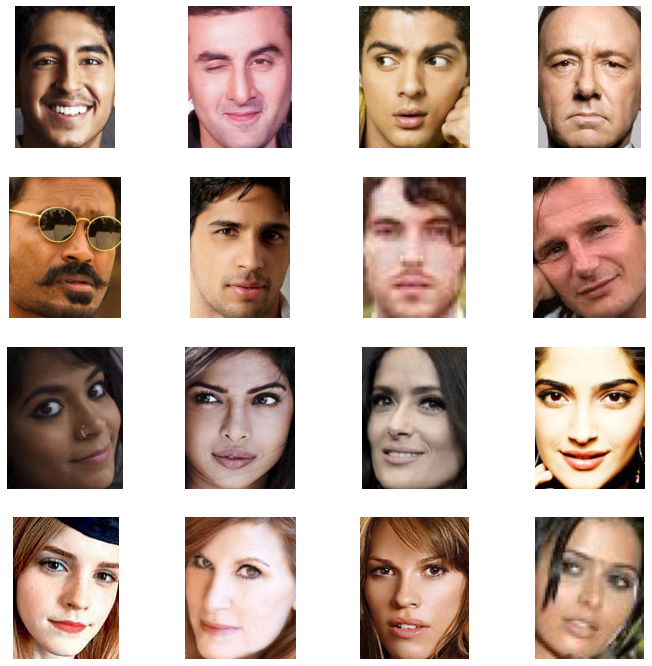

In [ ]:
#시각화
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

# next_cat_pix = [os.path.join(train_man_dir, fname)
#                 for fname in train_man_fnames[ pic_index-8:pic_index]]

# next_dog_pix = [os.path.join(train_woman_dir, fname)
#                 for fname in train_woman_fnames[ pic_index-8:pic_index]]
next_cat_pix = [os.path.join(train_man_dir, fname)
                for fname in train_man_fnames[ :8]]

next_dog_pix = [os.path.join(train_woman_dir, fname)
                for fname in train_woman_fnames[ :8]]


for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#데이터셋 만들기

bacth=30
img_height=150
img_width=150

In [ ]:
#ImageDataGenerator 클래스란?

#이미지를 학습시킬 때 학습데이터의 양이 적을 경우 학습데이터를 조금씩 변형시켜서 학습데이터의 양을 늘리는 방식중에 하나이다.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#ImageDataGenerator 객체 생성
train_datagen=ImageDataGenerator(rescale=1.0/255, 
                                 rotation_range=30, 
                                 shear_range=0.2, 
                                 zoom_range=0.4, 
                                 horizontal_flip=True
                                 )
test_datagen=ImageDataGenerator(rescale=1.0/255, 
                                rotation_range=30, 
                                shear_range=0.2, 
                                zoom_range=0.4, 
                                horizontal_flip=True
                                )

#이미지 변형
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=bacth,
                                                 class_mode='binary',
                                                 target_size=(img_height,img_width),
                                                 )
#test
test_generator=test_datagen.flow_from_directory(test_dir,
                                                batch_size=bacth,
                                                class_mode='binary',
                                                target_size=(img_height,img_width)
                                                      )
#flow_from_directory는 디렉토리에의 경로를 전달받아 증강된 데이터의 배치를 생성합니다.

Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.


In [ ]:
#ImageDataGenerator의 파라미터

# rescale = 1./255 : 값을 0과 1 사이로 변경
# rotation_range = 30 : 무작위 회전각도 30도 이내
# shear_range = 0.2 : 층밀리기 강도 20% 
# zoom_range = 0.2 : 무작위 줌 범위 20%
# horizontal_flip = True : 무작위로 가로로 뒤짚는다.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels[i])
    plt.axis("off")

AttributeError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
#이미지 배열로 만들기

In [ ]:
#라이브러리 설치
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
from PIL import Image

In [ ]:
#변환할 이미지 목록 불러오기
image_path = '/content/dataset/train/man/'

img_list = os.listdir(image_path) #디렉토리 내 모든 파일 불러오기
img_list_jpg = [img for img in img_list if img.endswith(".jpg")] #지정된 확장자만 필터링

print ("img_list_jpg: {}".format(img_list_jpg))

img_list_jpg: ['face_924.jpg', 'face_1171.jpg', 'face_612.jpg', 'face_606.jpg', 'face_554.jpg', 'face_1376.jpg', 'face_590.jpg', 'face_841.jpg', 'face_945.jpg', 'face_1352.jpg', 'face_637.jpg', 'face_1332.jpg', 'face_1048.jpg', 'face_1371.jpg', 'face_962.jpg', 'face_1444.jpg', 'face_1157.jpg', 'face_492.jpg', 'face_1026.jpg', 'face_988.jpg', 'face_566.jpg', 'face_1397.jpg', 'face_1317.jpg', 'face_685.jpg', 'face_680.jpg', 'face_1366.jpg', 'face_848.jpg', 'face_1253.jpg', 'face_538.jpg', 'face_857.jpg', 'face_502.jpg', 'face_1181.jpg', 'face_677.jpg', 'face_672.jpg', 'face_1455.jpg', 'face_926.jpg', 'face_1034.jpg', 'face_1012.jpg', 'face_620.jpg', 'face_1126.jpg', 'face_653.jpg', 'face_657.jpg', 'face_953.jpg', 'face_493.jpg', 'face_477.jpg', 'face_1021.jpg', 'face_572.jpg', 'face_861.jpg', 'face_1298.jpg', 'face_1419.jpg', 'face_1490.jpg', 'face_767.jpg', 'face_938.jpg', 'face_1321.jpg', 'face_1098.jpg', 'face_759.jpg', 'face_1509.jpg', 'face_900.jpg', 'face_939.jpg', 'face_875.jpg', 

In [ ]:
img_list_np = []

for i in img_list_jpg:
    img = Image.open(image_path + i)
    img_array = np.array(img)
    img_list_np.append(img_array)
    print(i, " 추가 완료 - 구조:", img_array.shape) # 불러온 이미지의 차원 확인 (세로X가로X색)
    #print(img_array.T.shape) #축변경 (색X가로X세로)

In [ ]:
img_np = np.array(img_list_np) #리스트를 numpy로 변환
print(img_np.shape)

(821,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
img_np= img_np.reshape(-1,1)
img_np.shape

(821, 1)

In [ ]:
img_np2= img_np2.reshape(-1,1)
img_np2.shape

(794, 1)

# 시작

In [ ]:
import tensorflow as tf

tf.__version__

'2.8.2'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image

In [ ]:
from keras.engine.sequential import Sequential
model =tf.keras.models.Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(2,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
history=model.fit(train_generator,validation_data=test_generator,epochs=20)

Epoch 1/20
54/54 [==============================] - 25s 239ms/step - loss: 0.6658 - accuracy: 0.6427 - val_loss: 0.5106 - val_accuracy: 0.7803
Epoch 2/20
54/54 [==============================] - 12s 228ms/step - loss: 0.4361 - accuracy: 0.8037 - val_loss: 0.4622 - val_accuracy: 0.7803
Epoch 3/20
54/54 [==============================] - 14s 255ms/step - loss: 0.3954 - accuracy: 0.8211 - val_loss: 0.4386 - val_accuracy: 0.8121
Epoch 4/20
54/54 [==============================] - 12s 228ms/step - loss: 0.3206 - accuracy: 0.8619 - val_loss: 0.4683 - val_accuracy: 0.8208
Epoch 5/20
54/54 [==============================] - 12s 227ms/step - loss: 0.3306 - accuracy: 0.8495 - val_loss: 0.3919 - val_accuracy: 0.8410
Epoch 6/20
54/54 [==============================] - 12s 228ms/step - loss: 0.3153 - accuracy: 0.8681 - val_loss: 0.3376 - val_accuracy: 0.8584
Epoch 7/20
54/54 [==============================] - 14s 251ms/step - loss: 0.2614 - accuracy: 0.8916 - val_loss: 0.3629 - val_accuracy: 0.8439

In [ ]:
test_loss,test_acc=model.evaluate(test_generator,verbose=2)
print(test_acc)

12/12 - 3s - loss: 0.3018 - accuracy: 0.8642 - 3s/epoch - 211ms/step
0.8641618490219116


In [ ]:
#정확도와 손실확인

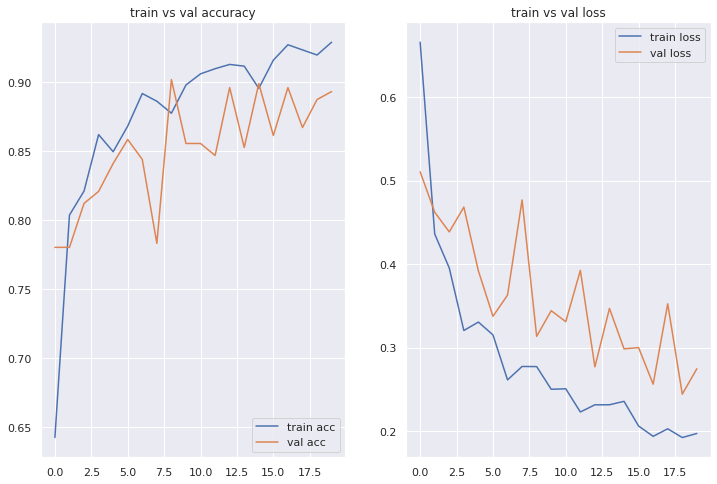

In [ ]:
#정확도
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

#오차 확인
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(20)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

#overfitting

# overfitting으로 인한 다시 학습

In [ ]:
#데이터증강해보기
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(150,150,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1)
])

In [ ]:
#드롭아웃

In [ ]:
model =tf.keras.models.Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(2,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
history=model.fit(train_generator,validation_data=test_generator,epochs=20)

Epoch 1/20
54/54 [==============================] - 13s 231ms/step - loss: 0.6400 - accuracy: 0.6458 - val_loss: 0.5297 - val_accuracy: 0.7399
Epoch 2/20
54/54 [==============================] - 14s 254ms/step - loss: 0.4742 - accuracy: 0.7759 - val_loss: 0.4763 - val_accuracy: 0.8006
Epoch 3/20
54/54 [==============================] - 14s 253ms/step - loss: 0.3802 - accuracy: 0.8316 - val_loss: 0.3795 - val_accuracy: 0.8439
Epoch 4/20
54/54 [==============================] - 12s 229ms/step - loss: 0.3974 - accuracy: 0.8310 - val_loss: 0.4698 - val_accuracy: 0.7977
Epoch 5/20
54/54 [==============================] - 12s 228ms/step - loss: 0.3721 - accuracy: 0.8440 - val_loss: 0.3538 - val_accuracy: 0.8642
Epoch 6/20
54/54 [==============================] - 12s 227ms/step - loss: 0.3280 - accuracy: 0.8563 - val_loss: 0.3600 - val_accuracy: 0.8555
Epoch 7/20
54/54 [==============================] - 14s 254ms/step - loss: 0.3251 - accuracy: 0.8650 - val_loss: 0.3537 - val_accuracy: 0.8526

In [ ]:
test_loss,test_acc=model.evaluate(test_generator,verbose=2)
print(test_acc)

12/12 - 3s - loss: 0.3389 - accuracy: 0.8613 - 3s/epoch - 210ms/step
0.8612716794013977


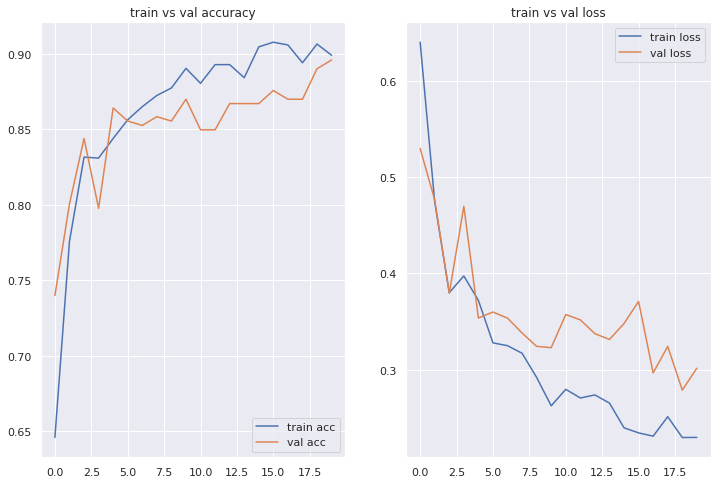

In [ ]:
#정확도
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

#오차 확인
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(20)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()